In [2]:
# Analysis for the dCas9_VPR data

%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

GL_gDNA_cDNA_input = pd.read_csv('/Users/qw2/Documents/Sanger/GL_analysis/00_Felicity/R_metadata_input_name.csv', sep=',')

GL_gDNA_cDNA_input_clean = GL_gDNA_cDNA_input.drop_duplicates(subset=['loc_chr', 'loc_location'], keep=False)

GL_gDNA_cDNA_input_clean['iPSC_SCP'] = GL_gDNA_cDNA_input_clean[['cDNA/gDNA ratio.12_SCP_A1_ips_vpr',
                                                                 'cDNA/gDNA ratio.13_SCP_A2_ips_vpr',
                                                                 'cDNA/gDNA ratio.14_SCP_B1_ips_vpr',
                                                                 'cDNA/gDNA ratio.15_SCP_B2_ips_vpr']].mean(axis=1)+ 0.00001

GL_gDNA_cDNA_input_clean['iPSC_SCR'] =  GL_gDNA_cDNA_input_clean[['cDNA/gDNA ratio.16_SCR_A1_ips_vpr',
                                                                  'cDNA/gDNA ratio.17_SCR_A2_ips_vpr',
                                                                  'cDNA/gDNA ratio.18_SCR_B1_ips_vpr',
                                                                  'cDNA/gDNA ratio.19_SCR_B2_ips_vpr']].mean(axis=1)+ 0.00001

GL_gDNA_cDNA_input_clean['iPSC_WT'] =  GL_gDNA_cDNA_input_clean[['cDNA/gDNA ratio.32_WT_A_ips_vpr',
                                                                 'cDNA/gDNA ratio.33_WT_B_ips_vpr']].mean(axis=1)+ 0.00001

GL_gDNA_cDNA_input_clean['iNeuron_SCP'] = GL_gDNA_cDNA_input_clean[['cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr',
                                                                    'cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr',
                                                                    'cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr',
                                                                    'cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr']].mean(axis=1)+0.00001

GL_gDNA_cDNA_input_clean['iNeuron_SCR'] = GL_gDNA_cDNA_input_clean[['cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr',
                                                                    'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr',
                                                                    'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr',
                                                                    'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr']].mean(axis=1)+ 0.00001

GL_gDNA_cDNA_input_clean['iNeuron_WT'] = GL_gDNA_cDNA_input_clean[['cDNA/gDNA ratio.28_WT1_ineuron_vpr',
                                                                   'cDNA/gDNA ratio.29_WT2_ineuron_vpr',
                                                                   'cDNA/gDNA ratio.30_WT3_ineuron_vpr',
                                                                   'cDNA/gDNA ratio.31_WT4_ineuron_vpr']].mean(axis=1)+ 0.00001
# melt the dataframe to show iPSC activation
iPSC_GL_gDNA_cDNA_activation = GL_gDNA_cDNA_input_clean[['_barcode',
                                                         'cDNA/gDNA ratio.32_WT_A_ips_vpr',
                                                         'cDNA/gDNA ratio.33_WT_B_ips_vpr',
                                                         'cDNA/gDNA ratio.16_SCR_A1_ips_vpr',
                                                         'cDNA/gDNA ratio.17_SCR_A2_ips_vpr',
                                                         'cDNA/gDNA ratio.18_SCR_B1_ips_vpr',
                                                         'cDNA/gDNA ratio.19_SCR_B2_ips_vpr',
                                                         'cDNA/gDNA ratio.12_SCP_A1_ips_vpr',
                                                        'cDNA/gDNA ratio.13_SCP_A2_ips_vpr',
                                                        'cDNA/gDNA ratio.14_SCP_B1_ips_vpr',
                                                        'cDNA/gDNA ratio.15_SCP_B2_ips_vpr',]]
iPSC_GL_gDNA_cDNA_activation.columns = ['_barcode','WT_1','WT_2','scramble_1','scramble_2','scramble_3','scramble_4',
                                        'on_target_1', 'on_target_2','on_target_3','on_target_4']

iPSC_GL_melt = iPSC_GL_gDNA_cDNA_activation.melt(id_vars=['_barcode'])

iPSC_GL_melt['value_log'] = np.log(iPSC_GL_melt['value']+0.0001)

iPSC_GL_melt['value_log'] = np.log(iPSC_GL_melt['value']+0.0001)

sns.set(style="ticks", palette="pastel")
colors = ["grey","grey","g","g","g","g","m","m","m","m"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

from matplotlib import pyplot as plt
import ptitprince as pt
ax = pt.RainCloud(x='variable', y='value_log', data = iPSC_GL_melt,
                  width_viol = .8,
                  width_box = .3,
                  figsize = (12, 5),
                  move = .0,
                  palette = customPalette,
                  pointplot=True)

IOError: Initializing from file failed

In [18]:
# Calculate how many barcodes are activated for more than 2 folds
iPSC_GL_gDNA_cDNA_activation['control_median'] = iPSC_GL_gDNA_cDNA_activation[['WT_1','WT_2','scramble_1','scramble_2','scramble_3','scramble_4']].median(axis=1)
iPSC_GL_gDNA_cDNA_activation['sample_median'] = iPSC_GL_gDNA_cDNA_activation[['on_target_1', 'on_target_2','on_target_3','on_target_4']].median(axis=1)
iPSC_GL_gDNA_cDNA_activation['fold_change'] = iPSC_GL_gDNA_cDNA_activation['sample_median'] / iPSC_GL_gDNA_cDNA_activation['control_median']
iPSC_GL_gDNA_cDNA_activation[iPSC_GL_gDNA_cDNA_activation['fold_change']>2].count() / iPSC_GL_gDNA_cDNA_activation.count()

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

_barcode          0.581379
WT_1              0.581379
WT_2              0.581379
scramble_1        0.581379
scramble_2        0.581379
scramble_3        0.581379
scramble_4        0.581379
on_target_1       0.581379
on_target_2       0.581379
on_target_3       0.581379
on_target_4       0.581379
control_median    0.581379
sample_median     0.581379
fold_change       0.634939
dtype: float64

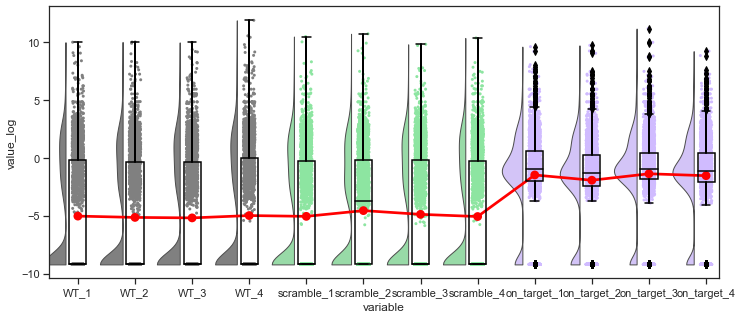

In [19]:
# melt the dataframe to show iNeuron activation
iNeuron_GL_gDNA_cDNA_activation = GL_gDNA_cDNA_input_clean[['_barcode',
                                                            'cDNA/gDNA ratio.28_WT1_ineuron_vpr',
                                                            'cDNA/gDNA ratio.29_WT2_ineuron_vpr',
                                                            'cDNA/gDNA ratio.30_WT3_ineuron_vpr',
                                                            'cDNA/gDNA ratio.31_WT4_ineuron_vpr',
                                                            'cDNA/gDNA ratio.24_VPRscr1_ineuron_vpr',
                                                            'cDNA/gDNA ratio.25_VPRscr2_ineuron_vpr',
                                                            'cDNA/gDNA ratio.26_VPRscr3_ineuron_vpr',
                                                            'cDNA/gDNA ratio.27_VPRscr4_ineuron_vpr',
                                                            'cDNA/gDNA ratio.20_VPRscp1_ineuron_vpr',
                                                        'cDNA/gDNA ratio.21_VPRscp2_ineuron_vpr',
                                                        'cDNA/gDNA ratio.22_VPRscp3_ineuron_vpr',
                                                        'cDNA/gDNA ratio.23_VPRscp4_ineuron_vpr',
                                                            ]]
iNeuron_GL_gDNA_cDNA_activation.columns = ['_barcode',
                                           'WT_1','WT_2','WT_3','WT_4',
                                           'scramble_1','scramble_2','scramble_3','scramble_4',
                                           'on_target_1', 'on_target_2','on_target_3','on_target_4']
                                

iNeuron_GL_melt = iNeuron_GL_gDNA_cDNA_activation.melt(id_vars=['_barcode'])
iNeuron_GL_melt['value_log'] = np.log(iNeuron_GL_melt['value']+0.0001)
sns.set(style="ticks", palette="pastel")
colors = ["grey","grey","grey","grey","g","g","g","g","m","m","m","m"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

import ptitprince as pt
ax = pt.RainCloud(x='variable', y='value_log', data = iNeuron_GL_melt,
                  width_viol = .8,
                  width_box = .3,
                  figsize = (12, 5),
                  move = .0,
                  palette = customPalette,
                  pointplot=True)

In [20]:
# Calculate how many barcodes are activated for more than 2 folds
iNeuron_GL_gDNA_cDNA_activation['control_median'] = iNeuron_GL_gDNA_cDNA_activation[['WT_1','WT_2','scramble_1','scramble_2','scramble_3','scramble_4']].median(axis=1)
iNeuron_GL_gDNA_cDNA_activation['sample_median'] = iNeuron_GL_gDNA_cDNA_activation[['on_target_1', 'on_target_2','on_target_3','on_target_4']].median(axis=1)
iNeuron_GL_gDNA_cDNA_activation['fold_change'] = iNeuron_GL_gDNA_cDNA_activation['sample_median'] / iNeuron_GL_gDNA_cDNA_activation['control_median']
iNeuron_GL_gDNA_cDNA_activation[iNeuron_GL_gDNA_cDNA_activation['fold_change']>2].count() / iNeuron_GL_gDNA_cDNA_activation.count()

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

_barcode          0.625481
WT_1              0.625481
WT_2              0.625481
WT_3              0.625481
WT_4              0.625481
scramble_1        0.625481
scramble_2        0.625481
scramble_3        0.625481
scramble_4        0.625481
on_target_1       0.625481
on_target_2       0.625481
on_target_3       0.625481
on_target_4       0.625481
control_median    0.625481
sample_median     0.625481
fold_change       0.671552
dtype: float64

In [16]:
import scipy
from scipy import stats
WT_iPSC = iPSC_GL_melt.loc[iPSC_GL_melt['variable'].str.contains("WT")]
control_iPSC = iPSC_GL_melt.loc[iPSC_GL_melt['variable'].str.contains("scramble")]
VPR_iPSC = iPSC_GL_melt.loc[iPSC_GL_melt['variable'].str.contains("on_target")]
scipy.stats.ttest_ind(control_iPSC['value'], VPR_iPSC['value'], axis=0, equal_var=False)

Ttest_indResult(statistic=0.04353138207359522, pvalue=0.9652783311437356)

In [27]:
# Get the t test p values
iPSC_GL_gDNA_cDNA_activation.to_csv(r"/Users/qw2/Desktop/all_data.csv",index=False,sep="\t",header=False)